<a href="https://colab.research.google.com/github/Meisam-Heidari/reCLAIM-2019-Competition/blob/master/EDA_Meisam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#from google.colab import drive
#drive.mount('/gdrive')
#%cd /gdrive

# Classification DataSet

## Loading

In [3]:
#df_clas_header_test = pd.read_csv("/gdrive/My Drive/reCLAIM 2019 Competition/classification_comp_starter_kit/classification_comp_starter_kit/Header - test.txt")
#df_clas_header_train = pd.read_csv("/gdrive/My Drive/reCLAIM 2019 Competition/classification_comp_starter_kit/classification_comp_starter_kit/Header - train.txt")
#df_clas_header_validation = pd.read_csv("/gdrive/My Drive/reCLAIM 2019 Competition/classification_comp_starter_kit/classification_comp_starter_kit/Header - validation.txt")
#df_clas_well_class_train = pd.read_csv("/gdrive/My Drive/reCLAIM 2019 Competition/classification_comp_starter_kit/classification_comp_starter_kit/Well_class_train.txt")
#df_clas_well_class_validation = pd.read_csv("/gdrive/My Drive/reCLAIM 2019 Competition/classification_comp_starter_kit/classification_comp_starter_kit/Well_class_validate.txt")

In [4]:
df_clas_header_test = pd.read_csv("classification/Header - test.txt")
df_clas_header_train = pd.read_csv("classification/Header - train.txt")
df_clas_header_validation = pd.read_csv("classification/Header - validation.txt")
df_clas_well_class_train = pd.read_csv("classification/Well_class_train.txt")
df_clas_well_class_validation = pd.read_csv("classification/Well_class_validate.txt")

In [5]:
df_clas_header_test.head(2)


,EPAssetsId,Province,LicenceNumber,UWI,CurrentOperator,CurrentOperatorParent,CurrentOperatorID,Licensee,LicenseeParentCompany,LicenseeID,...,UnitID,UnitName,UnitFlag,Municipality,CompletionDate,Agent,_Max`Prod`(BOE),_Fracture`Stages,_Open`Hole,_Completion`Events
0,2367432,Alberta,0195212,102032605705W400,Canadian Natural Resources Limited,159,NaN,Canadian Natural Resources Limited,159,NaN,...,NaN,NaN,No,NaN,NaN,Unspecified,NaN,NaN,CasedCompleted,NaN
1,2475476,Alberta,0264445,100023507714W400,Canadian Natural Resources Limited,159,NaN,Point Loma Resources Ltd.,8932,NaN,...,NaN,NaN,No,NaN,NaN,Unspecified,NaN,NaN,CasedCompleted,NaN


In [6]:
df_clas_well_class_train.head(2)

,EPAssetsId,well_status,well_status_code
0,2314251,Suspended,2
1,2341273,Active,1


In [7]:
df_clas_well_class_validation.head(2)

,EPAssetsId,well_status,well_status_code
0,9,Suspended,2
1,17,Active,1


In [8]:
headers = []
for i in range(len(df_clas_header_train.columns)):
  headers.append([df_clas_header_train.columns[i],df_clas_header_validation.columns[i],df_clas_header_test.columns[i]])
headers

[['EPAssetsId', 'EPAssetsId', 'EPAssetsId'],
 ['Province', 'Province', 'Province'],
 ['LicenceNumber', 'LicenceNumber', 'LicenceNumber'],
 ['UWI', 'UWI', 'UWI'],
 ['CurrentOperator', 'CurrentOperator', 'CurrentOperator'],
 ['CurrentOperatorParent', 'CurrentOperatorParent', 'CurrentOperatorParent'],
 ['CurrentOperatorID', 'CurrentOperatorID', 'CurrentOperatorID'],
 ['Licensee', 'Licensee', 'Licensee'],
 ['LicenseeParentCompany', 'LicenseeParentCompany', 'LicenseeParentCompany'],
 ['LicenseeID', 'LicenseeID', 'LicenseeID'],
 ['LicenceDate', 'LicenceDate', 'LicenceDate'],
 ['WellType', 'WellType', 'WellType'],
 ['WellTypeStandardised', 'WellTypeStandardised', 'WellTypeStandardised'],
 ['ConfidentialReleaseDate',
  'ConfidentialReleaseDate',
  'ConfidentialReleaseDate'],
 ['SurfAbandonDate', 'SurfAbandonDate', 'SurfAbandonDate'],
 ['WellName', 'WellName', 'WellName'],
 ['WellNameAmended', 'WellNameAmended', 'WellNameAmended'],
 ['Formation', 'Formation', 'Formation'],
 ['Field', 'Field', '

## Header Test file

In [9]:
df_clas_header_test.shape

(118076, 90)

In [10]:
df_clas_header_test.nunique()

EPAssetsId            118076
Province                   4
LicenceNumber         112547
UWI                   116725
CurrentOperator          860
                       ...  
Agent                    356
_Max`Prod`(BOE)        21636
_Fracture`Stages          89
_Open`Hole                 2
_Completion`Events       174
Length: 90, dtype: int64

In [11]:
df_clas_header_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118076 entries, 0 to 118075
Data columns (total 90 columns):
EPAssetsId                 118076 non-null int64
Province                   118076 non-null object
LicenceNumber              118076 non-null object
UWI                        118076 non-null object
CurrentOperator            118076 non-null object
CurrentOperatorParent      118076 non-null int64
CurrentOperatorID          25138 non-null float64
Licensee                   118076 non-null object
LicenseeParentCompany      118076 non-null int64
LicenseeID                 1667 non-null float64
LicenceDate                118074 non-null object
WellType                   118076 non-null object
WellTypeStandardised       118076 non-null object
ConfidentialReleaseDate    62998 non-null object
SurfAbandonDate            26822 non-null object
WellName                   117976 non-null object
WellNameAmended            117976 non-null object
Formation                  118076 non-null ob

## Header Validation File

In [12]:
df_clas_header_validation.shape

(132131, 90)

In [13]:
df_clas_header_validation.nunique()

EPAssetsId            132131
Province                   4
LicenceNumber         125962
UWI                   130765
CurrentOperator          913
                       ...  
Agent                    439
_Max`Prod`(BOE)        21560
_Fracture`Stages          86
_Open`Hole                 2
_Completion`Events       170
Length: 90, dtype: int64

In [14]:
df_clas_header_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132131 entries, 0 to 132130
Data columns (total 90 columns):
EPAssetsId                 132131 non-null int64
Province                   132131 non-null object
LicenceNumber              132131 non-null object
UWI                        132130 non-null object
CurrentOperator            132131 non-null object
CurrentOperatorParent      132131 non-null int64
CurrentOperatorID          27993 non-null float64
Licensee                   132131 non-null object
LicenseeParentCompany      132131 non-null int64
LicenseeID                 2031 non-null float64
LicenceDate                132126 non-null object
WellType                   132131 non-null object
WellTypeStandardised       132131 non-null object
ConfidentialReleaseDate    69272 non-null object
SurfAbandonDate            35942 non-null object
WellName                   132034 non-null object
WellNameAmended            132034 non-null object
Formation                  132131 non-null ob

## Header train File

In [15]:
df_clas_header_train.shape

(588673, 90)

In [16]:
df_clas_header_train.nunique()

EPAssetsId            588673
Province                   4
LicenceNumber         485571
UWI                   582171
CurrentOperator         1468
                       ...  
Agent                    929
_Max`Prod`(BOE)        86073
_Fracture`Stages         131
_Open`Hole                 2
_Completion`Events       305
Length: 90, dtype: int64

In [17]:
df_clas_header_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588673 entries, 0 to 588672
Data columns (total 90 columns):
EPAssetsId                 588673 non-null int64
Province                   588673 non-null object
LicenceNumber              588673 non-null object
UWI                        588673 non-null object
CurrentOperator            588673 non-null object
CurrentOperatorParent      588673 non-null int64
CurrentOperatorID          124038 non-null float64
Licensee                   588673 non-null object
LicenseeParentCompany      588673 non-null int64
LicenseeID                 8537 non-null float64
LicenceDate                588664 non-null object
WellType                   588673 non-null object
WellTypeStandardised       588673 non-null object
ConfidentialReleaseDate    310703 non-null object
SurfAbandonDate            149148 non-null object
WellName                   588206 non-null object
WellNameAmended            588206 non-null object
Formation                  588673 non-null

## Well class train File

In [18]:
df_clas_well_class_train.shape

(588673, 3)

In [19]:
df_clas_well_class_train.nunique()

EPAssetsId          588673
well_status              3
well_status_code         3
dtype: int64

In [20]:
df_clas_well_class_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588673 entries, 0 to 588672
Data columns (total 3 columns):
EPAssetsId          588673 non-null int64
well_status         588673 non-null object
well_status_code    588673 non-null int64
dtypes: int64(2), object(1)
memory usage: 13.5+ MB


In [21]:
df_clas_well_class_train.head()

,EPAssetsId,well_status,well_status_code
0,2314251,Suspended,2
1,2341273,Active,1
2,1086314,Abandoned,0
3,2210835,Abandoned,0
4,40946,Suspended,2


In [22]:
df_clas_well_class_train.describe()

,EPAssetsId,well_status_code
count,5.886730e+05,588673.000000
mean,2.019055e+06,0.759097
std,9.069427e+05,0.737610
min,1.000000e+00,0.000000
25%,2.001535e+06,0.000000
50%,2.210924e+06,1.000000
75%,2.420443e+06,1.000000
max,7.012320e+06,2.000000


## Well Class Validation File

In [23]:
df_clas_well_class_validation.shape

(132131, 3)

In [24]:
df_clas_well_class_validation.nunique()

EPAssetsId          132131
well_status              3
well_status_code         3
dtype: int64

In [25]:
df_clas_well_class_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132131 entries, 0 to 132130
Data columns (total 3 columns):
EPAssetsId          132131 non-null int64
well_status         132131 non-null object
well_status_code    132131 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.0+ MB


In [26]:
df_clas_well_class_validation.head()

,EPAssetsId,well_status,well_status_code
0,9,Suspended,2
1,17,Active,1
2,23,Abandoned,0
3,37,Active,1
4,39,Active,1


In [27]:
df_clas_well_class_validation.describe()

,EPAssetsId,well_status_code
count,1.321310e+05,132131.000000
mean,2.028815e+06,0.724955
std,9.144068e+05,0.738822
min,9.000000e+00,0.000000
25%,2.003216e+06,0.000000
50%,2.215400e+06,1.000000
75%,2.422774e+06,1.000000
max,7.012319e+06,2.000000


# Merge Data

In [28]:
df_clas_well_class_train['EPAssetsId'].duplicated().sum(), df_clas_header_train['EPAssetsId'].duplicated().sum()

(0, 0)

In [29]:
df_train = pd.merge(df_clas_well_class_train, df_clas_header_train, on = ['EPAssetsId','EPAssetsId'] )

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588673 entries, 0 to 588672
Data columns (total 92 columns):
EPAssetsId                 588673 non-null int64
well_status                588673 non-null object
well_status_code           588673 non-null int64
Province                   588673 non-null object
LicenceNumber              588673 non-null object
UWI                        588673 non-null object
CurrentOperator            588673 non-null object
CurrentOperatorParent      588673 non-null int64
CurrentOperatorID          124038 non-null float64
Licensee                   588673 non-null object
LicenseeParentCompany      588673 non-null int64
LicenseeID                 8537 non-null float64
LicenceDate                588664 non-null object
WellType                   588673 non-null object
WellTypeStandardised       588673 non-null object
ConfidentialReleaseDate    310703 non-null object
SurfAbandonDate            149148 non-null object
WellName                   588206 non-null 

In [31]:
df_clas_well_class_validation['EPAssetsId'].duplicated().sum(), df_clas_header_validation['EPAssetsId'].duplicated().sum()

(0, 0)

In [32]:
df_validation = pd.merge(df_clas_well_class_validation, df_clas_header_validation, on = ['EPAssetsId','EPAssetsId'] )

In [33]:
df_validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132131 entries, 0 to 132130
Data columns (total 92 columns):
EPAssetsId                 132131 non-null int64
well_status                132131 non-null object
well_status_code           132131 non-null int64
Province                   132131 non-null object
LicenceNumber              132131 non-null object
UWI                        132130 non-null object
CurrentOperator            132131 non-null object
CurrentOperatorParent      132131 non-null int64
CurrentOperatorID          27993 non-null float64
Licensee                   132131 non-null object
LicenseeParentCompany      132131 non-null int64
LicenseeID                 2031 non-null float64
LicenceDate                132126 non-null object
WellType                   132131 non-null object
WellTypeStandardised       132131 non-null object
ConfidentialReleaseDate    69272 non-null object
SurfAbandonDate            35942 non-null object
WellName                   132034 non-null obj

In [34]:
# Basic EDA


# Feature Engineering
- Correlation
- Score Gain
- ?

In [35]:
features_lst = list(df_train.columns)
len(features_lst)

92

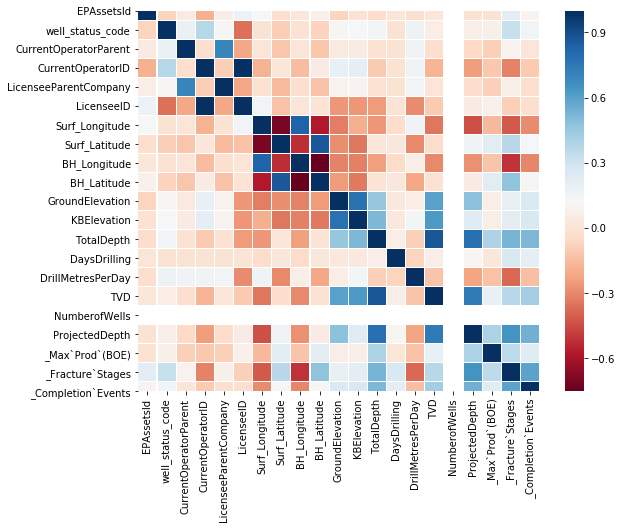

In [36]:
corr = df_train.corr()
plt.figure(figsize=(9,7))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    linecolor='white',
    linewidths=0.1,
    cmap="RdBu"
)
plt.show()

In [37]:
corr[corr>0.5] 

,EPAssetsId,well_status_code,CurrentOperatorParent,CurrentOperatorID,LicenseeParentCompany,LicenseeID,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,...,KBElevation,TotalDepth,DaysDrilling,DrillMetresPerDay,TVD,NumberofWells,ProjectedDepth,_Max`Prod`(BOE),_Fracture`Stages,_Completion`Events
EPAssetsId,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
well_status_code,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrentOperatorParent,NaN,NaN,1.000000,NaN,0.702048,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrentOperatorID,NaN,NaN,NaN,1.000000,NaN,0.999369,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LicenseeParentCompany,NaN,NaN,0.702048,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LicenseeID,NaN,NaN,NaN,0.999369,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surf_Longitude,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.829301,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surf_Latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.865559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BH_Longitude,NaN,NaN,NaN,NaN,NaN,NaN,0.829301,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BH_Latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.865559,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
corr[corr<-0.5] 

,EPAssetsId,well_status_code,CurrentOperatorParent,CurrentOperatorID,LicenseeParentCompany,LicenseeID,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,...,KBElevation,TotalDepth,DaysDrilling,DrillMetresPerDay,TVD,NumberofWells,ProjectedDepth,_Max`Prod`(BOE),_Fracture`Stages,_Completion`Events
EPAssetsId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
well_status_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrentOperatorParent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrentOperatorID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LicenseeParentCompany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LicenseeID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surf_Longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.706404,NaN,-0.574681,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surf_Latitude,NaN,NaN,NaN,NaN,NaN,NaN,-0.706404,NaN,-0.520553,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BH_Longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.520553,NaN,-0.751274,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.508717,NaN
BH_Latitude,NaN,NaN,NaN,NaN,NaN,NaN,-0.574681,NaN,-0.751274,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Lets Simplify the dataset

In [39]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

In [40]:
df_train[df_train['well_status']=='Abandoned'][df_train['SurveySystem']=='DLS']['SurveySystem'].nunique()

/Users/Meisam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1

In [41]:
df_train[df_train['OSArea']=='Cold Lake'][df_train['well_status'] =='Active'].head(50).transpose()

/Users/Meisam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,1,20,46,171,398,414,445,469,470,488,589,620,636,640,641,871,991,1079,1089,1101,1147,1156,1158,1164,1281,1351,1385,1425,1553,1560,1617,1720,2035,2051,2065,2148,2213,2418,2427,2499,2542,2568,2721,2817,2829,2916,3248,3268,3285,3318
EPAssetsId,2341273,2438366,2357291,2582033,2419158,2418293,2421081,2437657,2616979,2418698,2413385,2391245,2418445,2345605,2411674,2336133,2405769,2616081,2397457,2574718,2421291,2421176,2610348,2410522,2420220,2359040,2602326,2374377,2604688,2616898,2405387,2348781,2433116,2427220,2427136,2404819,2420541,2432119,2419118,2432121,2427162,2397943,2420098,2616490,2391260,2335221,2419643,2349671,2420052,2411642
well_status,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active
well_status_code,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Province,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta
LicenceNumber,0419701,0280194,0130457,0471092,0132578,0184632,0112735,0424670,0417232,0253325,0449080,0276078,0130575,0383575,0454492,0447420,0181353,0489697,0464369,0465438,0135451,0134595,0487585,0227409,0114401,0426211,0483133,0419168,0453907,0088170,0444220,0115338,0343463,0409631,0378195,0419310,0131563,0378782,0126624,0378784,0412973,0188305,0354902,0491436,0277245,0421232,0314372,0095347,0291809,0356857
UWI,100011505407W400,100123306805W400,100092005603W402,102010105702W400,100041906503W402,103150606503W400,108112206504W400,100050306804W400,100140705405W402,104030906503W400,100121306408W400,100102006108W400,105110706503W400,100130605501W400,1AA131606404W402,100023205306W400,100101306310W400,100043306306W403,102032906207W400,102090806309W400,106012606504W400,104052306504W400,100080206506W400,107131706403W400,110041306504W400,100152805606W400,102130706101W402,100072305805W400,104052406309W402,100071806705W402,100070906309W400,100092105505W404,100051306704W400,103142806604W400,103072106604W400,102151806308W400,105141406504W402,102030106703W400,1W0121806503W400,104030106703W400,104072206604W400,100112406210W403,104081206504W400,102131406506W400,100142206108W400,100110705302W400,100030806504W400,100151405506W402,110031206504W400,109143506403W400
CurrentOperator,Canadian Natural Resources Limited,Canadian Natural Resources Limited,West Lake Energy Corp.,Canadian Natural Resources Limited,No Current Operator,Imperial Oil Resources Limited,Imperial Oil Resources Limited,No Current Operator,Husky Oil Operations Limited,Imperial Oil Resources Limited,Devon Canada Corporation,Vantage Point Resources Inc.,Imperial Oil Resources Limited,Devon Canada Corporation,No Current Operator,Canadian Natural Resources Limited,Canadian Natural Resources Limited,No Current Operator,Canadian Natural Resources Limited,Canadian Natural Resources Limited,Imperial Oil Resources Limited,Imperial Oil Resources Limited,No Current Operator,Osum Production Corp.,Imperial Oil Resources Limited,Canadian Natural Resources Limited,Baytex Energy Ltd.,Canadian Natural Resources Limited,Canadian Natural Resources Limited,No Current Operator,Canadian Natural Resources Limited,Canadian Natural Resources Limited,Canadian Natural Resources Limited,Imperial Oil Resources Limited,Imperial Oil Resources Limited,Canadian Natural Resources Limited,Imperial Oil Resources Limited,Canadian Natural Resources Limited,Imperial Oil Resources Limited,Canadian Natural Resources Li

In [42]:
df_train.nunique()

EPAssetsId                 588673
well_status                     3
well_status_code                3
Province                        4
LicenceNumber              485571
UWI                        582171
CurrentOperator              1468
CurrentOperatorParent        1114
CurrentOperatorID             666
Licensee                     4307
LicenseeParentCompany        3257
LicenseeID                    374
LicenceDate                 19975
WellType                      149
WellTypeStandardised           65
ConfidentialReleaseDate     23392
SurfAbandonDate             22643
WellName                   471104
WellNameAmended            471104
Formation                     591
Field                        1997
Pool                        11028
SurveySystem                    2
Surf_Location              361759
Surf_Township                 128
Surf_Meridian                  11
Surf_Range                     37
Surf_Section                   38
Surf_LSD                       18
Surf_Longitude

In [43]:
# List of columns with too many null values: must be dropped
null_cols_to_drop = list(df_train.isnull().sum()[df_train.isnull().sum()>450000].index)
null_cols_to_drop

['CurrentOperatorID',
 'LicenseeID',
 'UnitID',
 'UnitName',
 'Municipality',
 'CompletionDate',
 '_Fracture`Stages',
 '_Completion`Events']

# Not important Columns to drop

- Cant drop any of the provinces because there is a good representation of them in the test dataset

In [44]:
df_train['Province'].value_counts()

Alberta             434043
Saskatchewan        115815
British Columbia     30278
Manitoba              8537
Name: Province, dtype: int64

In [45]:
df_clas_header_test['Province'].value_counts()

Alberta             86563
Saskatchewan        23531
British Columbia     6315
Manitoba             1667
Name: Province, dtype: int64

In [46]:
pd.unique(df_train['SurveySystem'])

array(['DLS', 'NTS'], dtype=object)

In [47]:
df_train['Province'][df_train['SurveySystem']=='NTS'].value_counts()

British Columbia    21478
Name: Province, dtype: int64

In [48]:
df_clas_header_test['Province'][df_train['SurveySystem']=='NTS'].value_counts()

Alberta             3127
Saskatchewan         837
British Columbia     228
Manitoba              66
Name: Province, dtype: int64

# Colomns wit similarities to drop

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588673 entries, 0 to 588672
Data columns (total 92 columns):
EPAssetsId                 588673 non-null int64
well_status                588673 non-null object
well_status_code           588673 non-null int64
Province                   588673 non-null object
LicenceNumber              588673 non-null object
UWI                        588673 non-null object
CurrentOperator            588673 non-null object
CurrentOperatorParent      588673 non-null int64
CurrentOperatorID          124038 non-null float64
Licensee                   588673 non-null object
LicenseeParentCompany      588673 non-null int64
LicenseeID                 8537 non-null float64
LicenceDate                588664 non-null object
WellType                   588673 non-null object
WellTypeStandardised       588673 non-null object
ConfidentialReleaseDate    310703 non-null object
SurfAbandonDate            149148 non-null object
WellName                   588206 non-null 

In [50]:
#pd.unique(df_train[df_train['well_status']=='Abandoned']['Municipality'])

In [51]:
#pd.unique(df_train[df_train['well_status']=='Active']['Municipality'])

In [52]:
useless_cols = ['UWI',
                'WellType',
 'ConfidentialReleaseDate',
 'WellName',
 'SurveySystem',
 'Surf_Location',
 'Surf_Township',
 'Surf_Meridian',
 'Surf_Range',
 'Surf_Section',
 'Surf_LSD',
 'Surf_Longitude',
 'Surf_Latitude',
 'Surf_TownshipRange',
 'Surf_QuarterUnit',
 'Surf_Unit',
 'Surf_Block',
 'Surf_NTSMapSheet',
 'Surf_Series',
 'Surf_Area',
 'Surf_Sheet',
 'Surf_QuarterSection',
 'BH_Location',
 'BH_TownshipRange',
 'BH_QuarterUnit',
 'BH_Unit',
 'BH_Block',
 'BH_NTSMapSheet',
 'BH_Series',
 'BH_Area',
 'BH_Sheet',
 'BH_QuarterSection',
 'BH_Longitude',
 'BH_Latitude',
 'BH_Township',
 'BH_Meridian',
 'BH_Range',
 'BH_Section',
 'BH_LSD',
 'GroundElevation',
 'KBElevation',
 'SurfaceOwner',
 'DrillingContractor',
 'SpudDate',
 'RigReleaseDate',
 'DaysDrilling',
 'DrillMetresPerDay',
 'Country',
 'RegulatoryAgency',
 'NumberofWells',
 'ProjectedDepth',
 'StatusSource',
 'UnitID',
 'UnitName',
 'UnitFlag',
 'Municipality',
 'CompletionDate',
 'Agent',
 '_Fracture`Stages',
 '_Completion`Events']
useless_cols[0],useless_cols[len(useless_cols)-1]

('UWI', '_Completion`Events')

In [53]:
overlaping_cols_to_drop =[
 'CurrentOperator',
 'CurrentOperatorParent',
 'Licensee',
 'LicenseeParentCompany',
 'WellType',
 'WellName',
 'OSArea']

In [54]:
for i in range(len(overlaping_cols_to_drop)):
    if overlaping_cols_to_drop[i] in list(df_train.columns):
        df_train.drop(overlaping_cols_to_drop[i], axis = 1, inplace=True)

for i in range(len(useless_cols)):
    if useless_cols[i] in list(df_train.columns):
        df_train.drop(useless_cols[i], axis = 1, inplace=True)
        
for i in range(len(null_cols_to_drop)):
    if null_cols_to_drop[i] in list(df_train.columns):
        df_train.drop(null_cols_to_drop[i], axis = 1, inplace=True)
        
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588673 entries, 0 to 588672
Data columns (total 25 columns):
EPAssetsId              588673 non-null int64
well_status             588673 non-null object
well_status_code        588673 non-null int64
Province                588673 non-null object
LicenceNumber           588673 non-null object
LicenceDate             588664 non-null object
WellTypeStandardised    588673 non-null object
SurfAbandonDate         149148 non-null object
WellNameAmended         588206 non-null object
Formation               588673 non-null object
Field                   588673 non-null object
Pool                    588442 non-null object
TotalDepth              582541 non-null float64
LaheeClass              588673 non-null object
Confidential            588673 non-null object
OSDeposit               557634 non-null object
FinalDrillDate          540114 non-null object
TVD                     552435 non-null float64
WellProfile             588673 non-null obj

In [55]:
df_train['LicenceDate'] = pd.to_datetime(df_train['LicenceDate'].str.split(' ', 0).str[0])
df_train['SurfAbandonDate'] = pd.to_datetime(df_train['SurfAbandonDate'].str.split(' ', 0).str[0])
df_train['FinalDrillDate'] = pd.to_datetime(df_train['FinalDrillDate'].str.split(' ', 0).str[0])
df_train['StatusDate'] = pd.to_datetime(df_train['StatusDate'].str.split(' ', 0).str[0])

In [56]:
# calculating the number of days between getting the license and reporting the status
days_to_stat= df_train['StatusDate']-df_train['LicenceDate']
days_to_stat.isnull().sum()

71

In [57]:
days_to_stat[days_to_stat<pd.Timedelta('0 days +00:00:00')] = np.nan
days_to_stat.isnull().sum()

986

In [58]:
# Storing the number of days as a floating number in a new columns
df_train['Days_to_StatusDate'] = days_to_stat.dt.days

In [59]:
# Check to see if we have same number of null values before and after creating the column
days_to_stat.isnull().sum() , df_train['Days_to_StatusDate'].isnull().sum() 

(986, 986)

In [60]:
df_train.replace('NaN',np.nan ,inplace=True)
df_train.replace('None',np.nan ,inplace=True)

In [61]:
df_train.head(5)

,EPAssetsId,well_status,well_status_code,Province,LicenceNumber,LicenceDate,WellTypeStandardised,SurfAbandonDate,WellNameAmended,Formation,Field,Pool,TotalDepth,LaheeClass,Confidential,OSDeposit,FinalDrillDate,TVD,WellProfile,WellSymbPt1,PSACAreaCode,PSACAreaName,StatusDate,_Max`Prod`(BOE),_Open`Hole,Days_to_StatusDate
0,2314251,Suspended,2,Alberta,0133238,1988-03-22,Gas,NaT,Cve Edson 12-18-49-16,Mannville,Edson,Commingled Pool 017,3044.0,Development,Non-Confidential,Not Applicable,1993-04-05,3044.00,Vertical,Gas,AB2,Foothills Front,2003-12-01,NaN,CasedCompleted,5732.0
1,2341273,Active,1,Alberta,0419701,2010-04-09,Bitumen,NaT,Cnrl 1b St. Paul 1-15-54-7,Dina,Derwent,Lower Grand Rapids,785.0,Development,Non-Confidential,Lower Grand Rapids,2010-07-27,628.77,Directional,Oil,AB4,East Central Alberta,2010-08-31,95.38271,CasedCompleted,144.0
2,1086314,Abandoned,0,Saskatchewan,11E153,2011-05-16,Oil,NaT,HUSKY WESTHAZEL A2-31-50-22,Paleozoic,Westhazel General Petroleum,Westhazel General Petroleum,621.0,Development,Non-Confidential,Not Applicable,2011-08-24,621.00,Vertical,Oil,SK1,Central Saskatchewan,2011-05-16,NaN,CasedCompleted,0.0
3,2210835,Abandoned,0,Alberta,0088786,1981-02-04,Oil,NaT,Caltex_Res Provost 10-21-37-1,Unspecified,Provost,Upper Mannville A,830.0,Outpost,Non-Confidential,Not Applicable,1981-02-09,830.00,Vertical,Oil,AB4,East Central Alberta,1987-02-19,NaN,CasedCompleted,2206.0
4,40946,Suspended,2,British Columbia,31827,2015-11-30,Unspecified,NaT,Leucrotta Two Rivers 16-30-082-16,Unspecified,Other Areas,Unspecified,1977.2,Outpost,Non-Confidential,NaN,NaT,NaN,Vertical,Other,BC2,Northern British Columbia,2016-07-14,NaN,CasedCompleted,227.0


In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588673 entries, 0 to 588672
Data columns (total 26 columns):
EPAssetsId              588673 non-null int64
well_status             588673 non-null object
well_status_code        588673 non-null int64
Province                588673 non-null object
LicenceNumber           588673 non-null object
LicenceDate             588664 non-null datetime64[ns]
WellTypeStandardised    588673 non-null object
SurfAbandonDate         149148 non-null datetime64[ns]
WellNameAmended         588206 non-null object
Formation               588673 non-null object
Field                   588673 non-null object
Pool                    588442 non-null object
TotalDepth              582541 non-null float64
LaheeClass              588673 non-null object
Confidential            588673 non-null object
OSDeposit               557634 non-null object
FinalDrillDate          540114 non-null datetime64[ns]
TVD                     552435 non-null float64
WellProfile        

In [63]:
df_train.nunique()

EPAssetsId              588673
well_status                  3
well_status_code             3
Province                     4
LicenceNumber           485571
LicenceDate              19975
WellTypeStandardised        65
SurfAbandonDate          22643
WellNameAmended         471104
Formation                  591
Field                     1997
Pool                     11028
TotalDepth               25690
LaheeClass                  17
Confidential                 5
OSDeposit                   13
FinalDrillDate           27257
TVD                      96613
WellProfile                  5
WellSymbPt1                  5
PSACAreaCode                15
PSACAreaName                15
StatusDate               26245
_Max`Prod`(BOE)          86073
_Open`Hole                   2
Days_to_StatusDate       20714
dtype: int64

Abandoned    248127
Active       234232
Suspended    106314
Name: well_status, dtype: int64

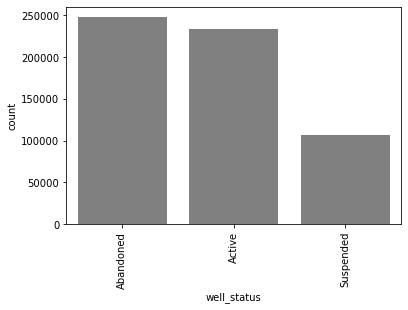

In [64]:
# univariate plots
fig1,axes=plt.subplots(nrows=1,ncols=1)
sns.countplot(df_train['well_status'], order = df_train.well_status.value_counts().
              index ,color = '0.5' )
plt.xticks(rotation = 90)
;
df_train['well_status'].value_counts()

Active       51302
Abandoned    38722
Suspended    25791
Name: well_status, dtype: int64

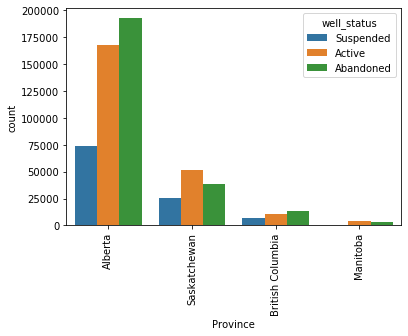

In [65]:
# univariate plots
# doesnt seemto be a good classifier, especially considering there is a finer geographical 
# classifier in PSACArea parameters
# Leave it out.
fig1,axes=plt.subplots(nrows=1,ncols=1)
sns.countplot(df_train['Province'], order = df_train.Province.value_counts().
              index , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train[df_train['Province']=='Saskatchewan']['well_status'].value_counts()

Abandoned    0.648556
Active       0.199201
Suspended    0.152242
Name: well_status, dtype: float64

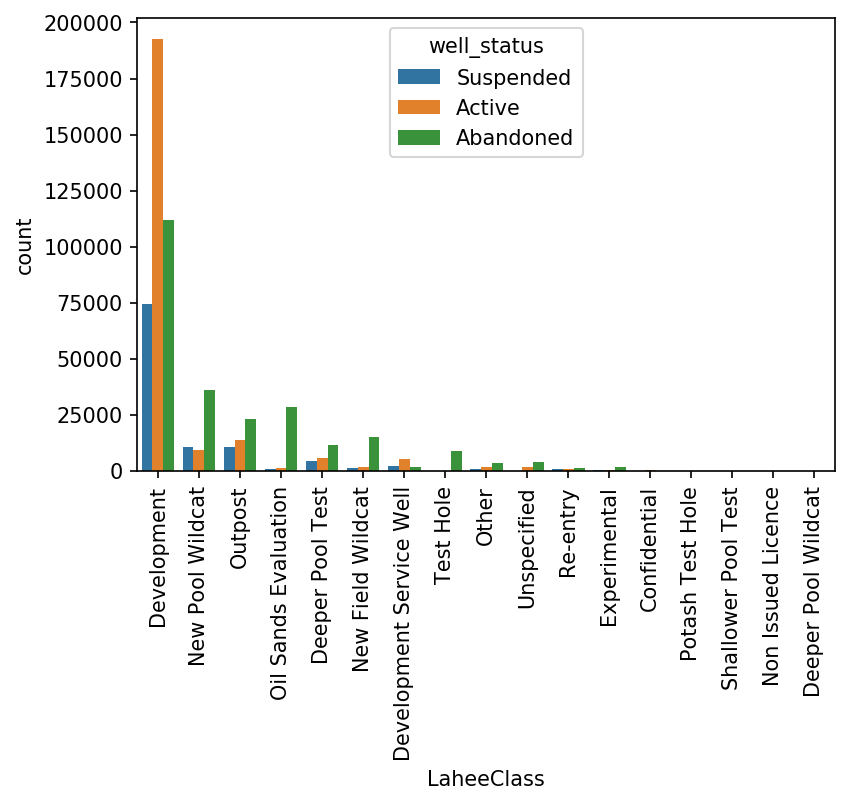

In [66]:
# univariate plots
# looks like a great identifier for abandoned wells. If the LaheeClass != Developmet, 
# there is a 64% chance that the well is abandoned
# Use it!
fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['LaheeClass'], order = df_train.LaheeClass.value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train[df_train['LaheeClass']!='Development']['well_status'].value_counts()/(136095+41801+31947)

Active       9954
Abandoned    6451
Suspended    1440
Name: well_status, dtype: int64

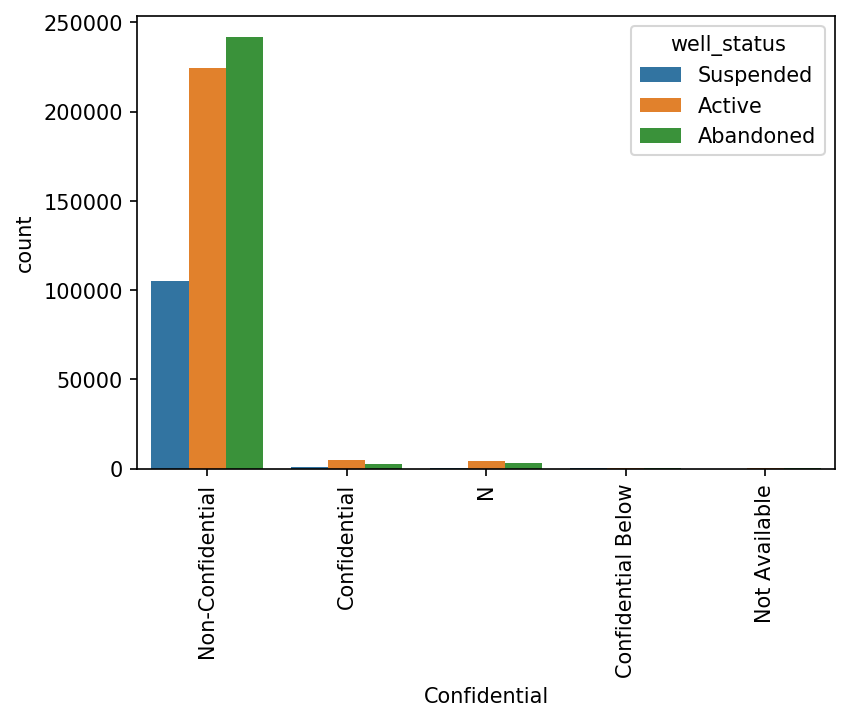

In [67]:
# univariate plots
# doesnt seem to be a good classifier. 
# leave it out
fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['Confidential'], order = df_train.Confidential.value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train[df_train['Confidential']!='Non-Confidential']['well_status'].value_counts()

Not Applicable          528084
Wabiskaw-Mcmurray        10111
Lower Grand Rapids        7836
Clearwater                5966
Upper Grand Rapids        4216
Bluesky-Gething           1261
Clearwater Undefined        93
Grosmont                    36
Pekisko Undefined           23
Nisku                        3
Middle Grand Rapids          3
Belloy                       1
Shunda                       1
Name: OSDeposit, dtype: int64

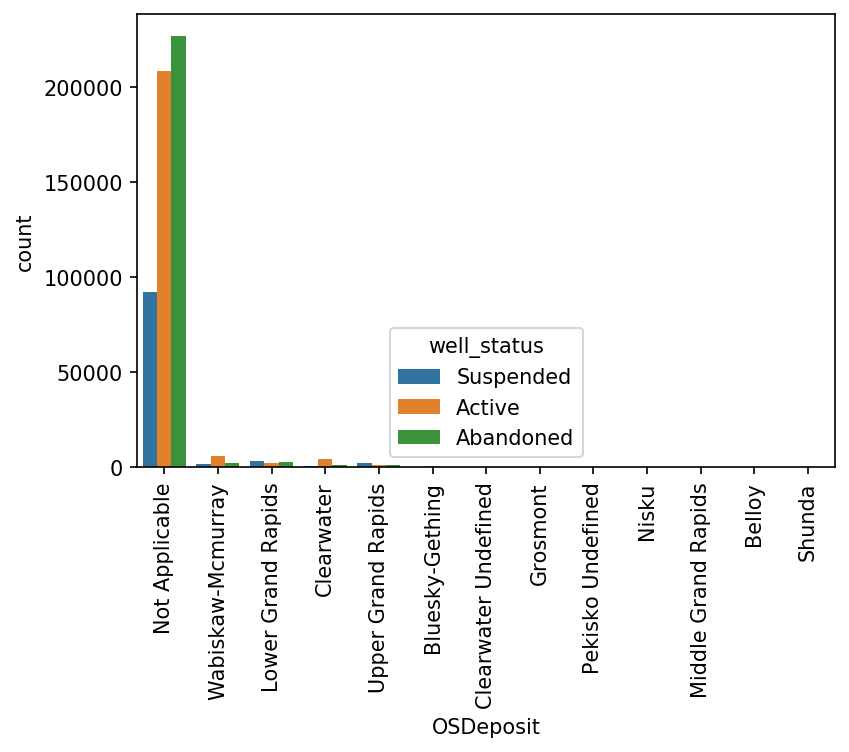

In [68]:
# univariate plot
# OSDeposit desnt seem to be a good dummy variable. df_train['OSDeposit']!= Not Applicable has 
# too few data points. The difference in ratio of Abondoned vs Active for 2 major classes is not that
# large(data in the next 2 cells)
# leave it out!
fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['OSDeposit'], order = df_train.OSDeposit.value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train['OSDeposit'].value_counts()

In [69]:
df_train[df_train['OSDeposit']=='Not Applicable']['well_status'].value_counts()/(528084)


Abandoned    0.430000
Active       0.395233
Suspended    0.174768
Name: well_status, dtype: float64

In [70]:
df_train[df_train['OSDeposit']!='Not Applicable']['well_status'].value_counts()/(588673-528084)

Active       0.421133
Abandoned    0.347439
Suspended    0.231428
Name: well_status, dtype: float64

Vertical          414139
Directional        91827
Horizontal         82592
Horizontal Leg        69
Slant                 46
Name: WellProfile, dtype: int64

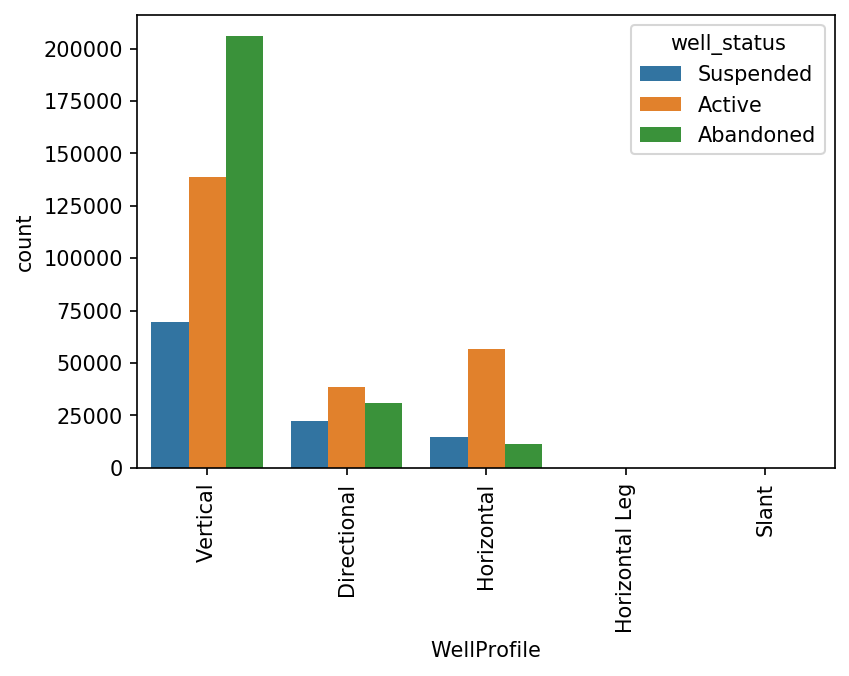

In [71]:
# univariate plots
# Awsome, probably need to drop last 2 categories, then use remaining 3 categories
# use it!
fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['WellProfile'], order = df_train.WellProfile.value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train['WellProfile'].value_counts()


Other        199821
Gas          190117
Oil          178375
Injection     20356
Oil & Gas         4
Name: WellSymbPt1, dtype: int64

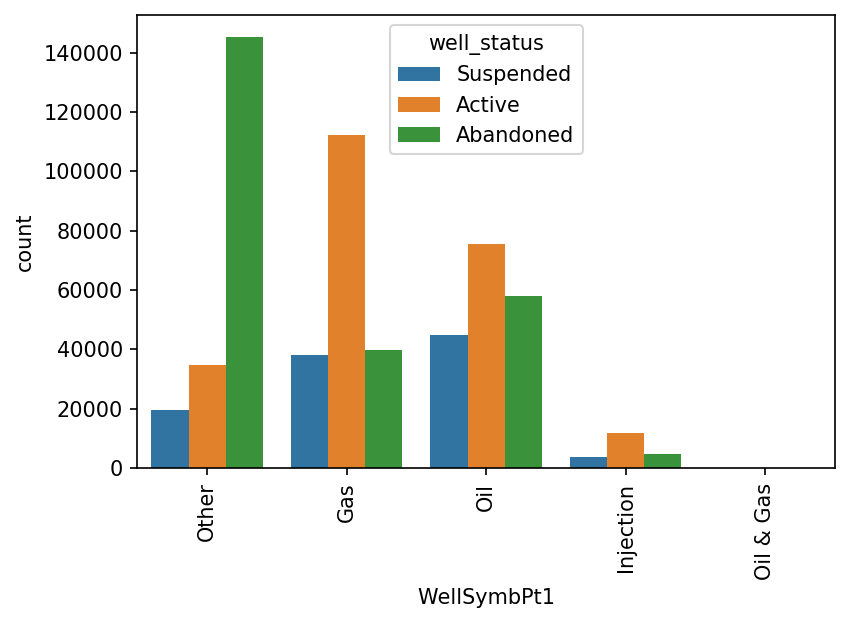

In [72]:
# univariate plots
# too good to dismiss. 
# Use it!

fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['WellSymbPt1'], order = df_train.WellSymbPt1.value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train['WellSymbPt1'].value_counts()

AB3    134944
AB5     71561
AB6     66792
AB2     57989
AB4     55351
SK2     47632
AB7     44662
SK1     34430
SK3     33753
BC2     29852
MB       8537
AB1      2744
BC1       318
BC0        77
BC3        31
Name: PSACAreaCode, dtype: int64

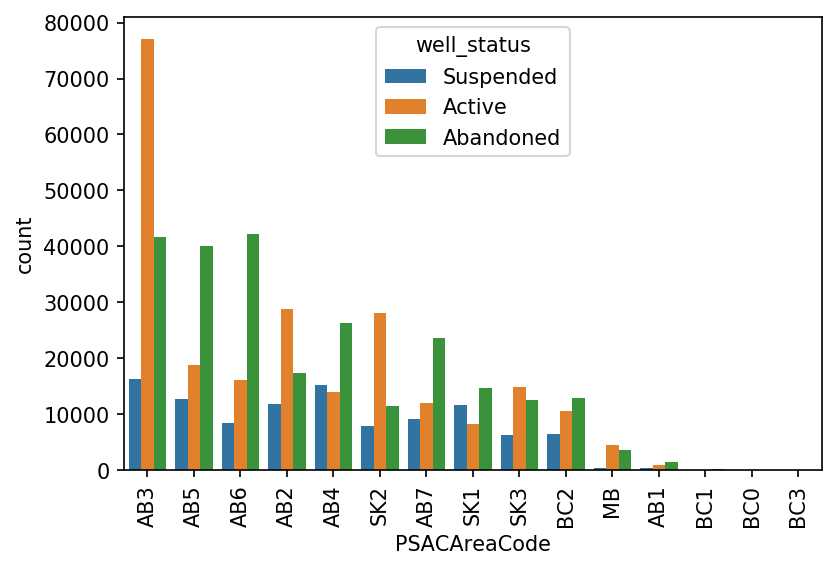

In [73]:
# univariate plots
# would be awsome to use all the categories as opposed to 0-1 dummies
# regardless, use it!

fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['PSACAreaCode'], order = df_train.PSACAreaCode.value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train['PSACAreaCode'].value_counts()

Southeastern Alberta         134944
Central Alberta               71561
Northeastern Alberta          66792
Foothills Front               57989
East Central Alberta          55351
Southwestern Saskatchewan     47632
Northwestern Alberta          44662
Central Saskatchewan          34430
Eastern Saskatchewan          33753
Northern British Columbia     29852
Manitoba                       8537
Foothills                      2744
Southern British Columbia       318
Other British Columbia           77
Coastal British Columbia         31
Name: PSACAreaName, dtype: int64

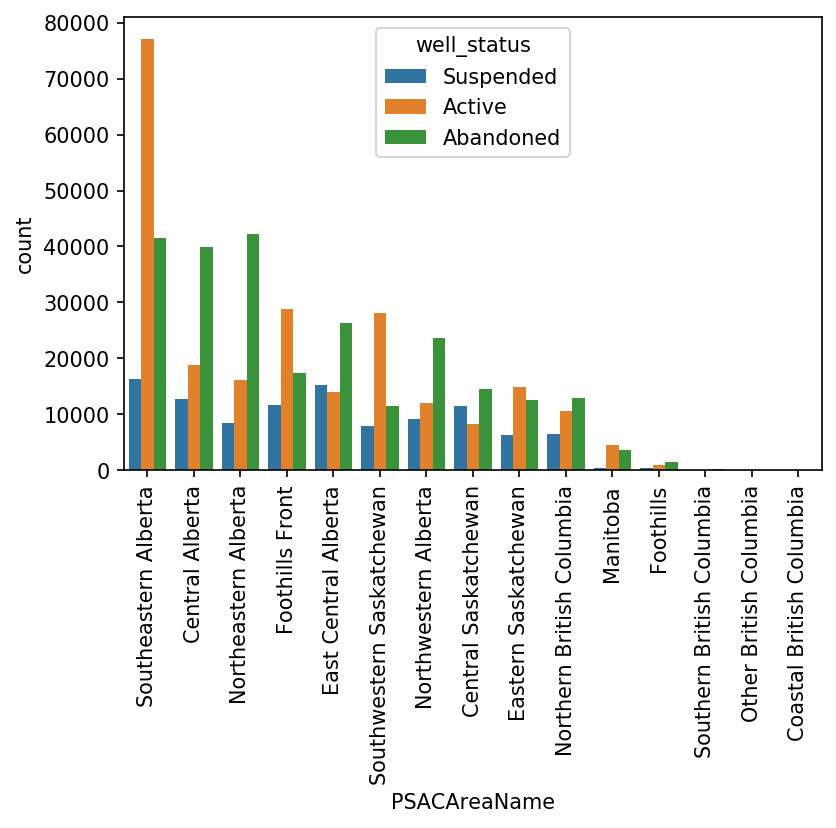

In [74]:
# univariate plots
# same as 'PSACAreaCode'.
# Drop it.
fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['PSACAreaName'], order = df_train.PSACAreaName.value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train['PSACAreaName'].value_counts()

''

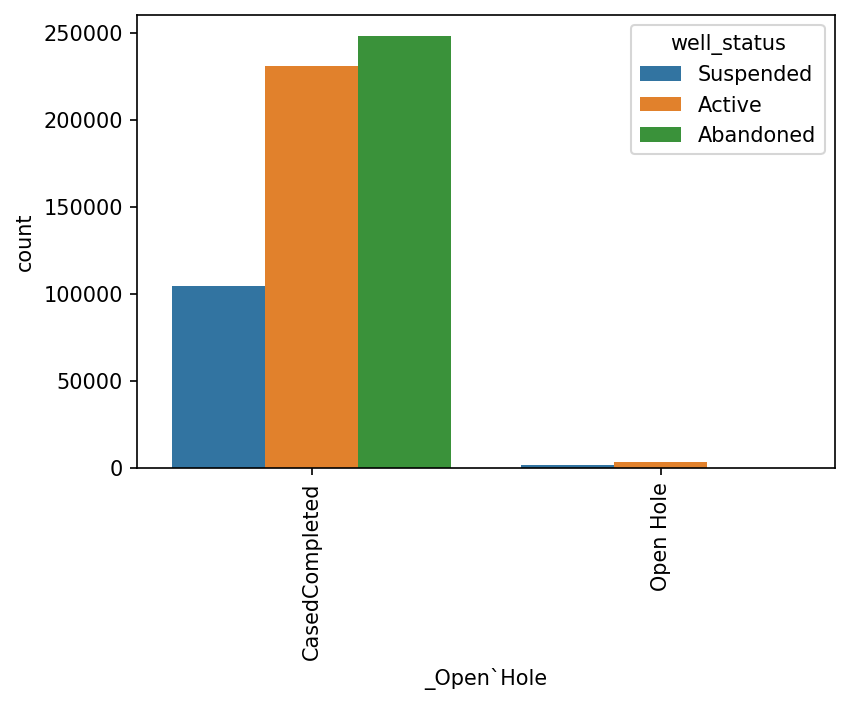

In [75]:
# univariate plots
# Not good!
# leave it out.
fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['_Open`Hole'], order = df_train['_Open`Hole'].value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;

In [76]:
df_train['_Open`Hole'].value_counts()

CasedCompleted    583755
Open Hole           4918
Name: _Open`Hole, dtype: int64

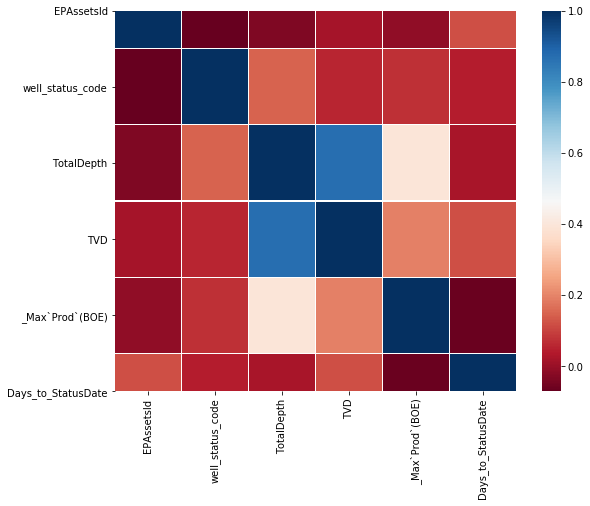

In [77]:
# Total Depth may be a usefull parameter. Further investigate. 
corr = df_train.corr()
plt.figure(figsize=(9,7))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    linecolor='white',
    linewidths=0.1,
    cmap="RdBu"
)
plt.show()

In [78]:
# License number is alpha numerical, can't include it in prediction
# Leave it out.
df_train['LicenceNumber'].sample(10)

148371      04782
121735    0341178
561961    0423663
9916      0341603
302357    0466038
25056     0416354
273037    0222608
538744    0487013
541596    0313062
7595      0202197
Name: LicenceNumber, dtype: object

In [79]:
# seems that almost all the wells with an existing SurfAbandonDate are abandoned
# Use it.

df_train[df_train['SurfAbandonDate'].notna()]['well_status'].value_counts()

Abandoned    147774
Suspended       853
Active          521
Name: well_status, dtype: int64

In [80]:
# it seems a large portion of abondoned wells (50% +) belong to "Unspecified" Pool category, while it has 
# a smaller role in suspended wells and even smaller one for Active wells. 
# considering more than 11,000 pool types, "Pool == Unspecified" should simplify this and 
# create a good dummy variable
# create and Use 'Pool' dummy as stated above


#---------------------
# Similar but much weaker relationship exists for Unspecified Formation. But to avoid inter-relationship between
# features, it is should not be considered
# Leave "Formation" out.
#--------------------
# Same strong relationship doesnt exist for Field names
# Leave "Field" out.


df_train[df_train['well_status']=='Abandoned']['Pool'].value_counts()/248127

Unspecified                           0.545696
Not Available                         0.041684
Commingled MFP9501                    0.025092
Commingled Pool 001                   0.011514
Lower Grand Rapids                    0.010543
                                        ...   
Cummings TT                           0.000004
Belly River R2R                       0.000004
Pine Point C-059-H/094-I-11           0.000004
Spirit River B-091-A/094-P-12         0.000004
Nordegg-Baldonnel D-027-H/094-A-16    0.000004
Name: Pool, Length: 7223, dtype: float64

In [81]:
df_train[df_train['well_status']=='Active']['Pool'].value_counts()/234232

Commingled MFP9501             0.253667
Unspecified                    0.056252
Commingled MFP9529             0.026431
Wabiskaw-Mcmurray              0.026282
Commingled Pool 001            0.025398
                                 ...   
Ellerslie OOO                  0.000004
Montney T3T                    0.000004
Mannville O11O                 0.000004
Sparky YY                      0.000004
Nikanassin A-092-K/094-A-14    0.000004
Name: Pool, Length: 6171, dtype: float64

In [82]:
df_train[df_train['well_status']=='Suspended']['Pool'].value_counts()/106314

Unspecified                0.187087
Commingled MFP9501         0.040418
Commingled Pool 001        0.029479
Lower Grand Rapids         0.028463
Upper Grand Rapids         0.018963
                             ...   
A Marker/Base Of Lime H    0.000009
Edmonton XX                0.000009
Belly River Y5Y            0.000009
Ostracod N                 0.000009
Montney K7K                0.000009
Name: Pool, Length: 6318, dtype: float64

In [83]:
# Seem extremely small TVD depth is associated with increased chance of having an abondoned well, 
# however larger TVDs dont shift the results one way or another
# it is difficult to see how this can help prediction
# test to see if it helps. 
df_train[df_train['TVD']<450]['well_status'].value_counts()/(48426+19728+7410)

Abandoned    0.640861
Active       0.261077
Suspended    0.098063
Name: well_status, dtype: float64

In [84]:
# Seem extremely smaller well depth is associated with increased chance of having an abondoned well, while
# relatively large well depth increases chance of having an active well.
# this might overlap with having a horizontal well
# regardless, this may be one of the input features. 
# Test to see if it helps

df_train[df_train['TotalDepth']<530]['well_status'].value_counts()

Abandoned    64469
Active       30580
Suspended    12094
Name: well_status, dtype: int64

In [85]:
df_train.describe()

,EPAssetsId,well_status_code,TotalDepth,TVD,_Max`Prod`(BOE),Days_to_StatusDate
count,5.886730e+05,588673.000000,582541.000000,552435.000000,187602.000000,587687.000000
mean,2.019055e+06,0.759097,1219.381771,1034.012322,65.415357,2251.789398
std,9.069427e+05,0.737610,925.750194,732.708950,244.694592,3878.477896
min,1.000000e+00,0.000000,0.000000,0.000000,0.019619,0.000000
25%,2.001535e+06,0.000000,592.500000,554.000000,3.019104,17.000000
50%,2.210924e+06,1.000000,940.000000,804.000000,9.358422,198.000000
75%,2.420443e+06,1.000000,1621.300000,1348.700000,33.720639,3150.000000
max,7.012320e+06,2.000000,39867.000000,6803.000000,20177.542605,29620.000000


In [86]:
# the effect of Days_to_StatusDate on well status does not seem to be linear. It also seems that it needs 
# more than 2 bins to help with classification
# To include it, we may need some classification work or hyper parameter tuning
# Test to see if it helps

df_train[df_train['Days_to_StatusDate']>80]['well_status'].value_counts()

Active       154013
Abandoned    134785
Suspended     66741
Name: well_status, dtype: int64

In [87]:
# _Max`Prod`(BOE) seems to be great for identifying Active wells
# _Max`Prod`(BOE) notnull can be a great dummy variable to help identifying Active wells
# use it, but pleaeaeaease change the name!
df_train[df_train['''_Max`Prod`(BOE)''']>0]['well_status'].value_counts()/187602

Active       0.860295
Suspended    0.120478
Abandoned    0.019227
Name: well_status, dtype: float64

In [88]:
161393+22602+3607

187602

# Create Dummies
- Hot encoding or not?


In [89]:
df_train_processed = df_train.copy()

In [90]:
df_train_processed['''_Max`Prod`(BOE)'''].where(df_train_processed['''_Max`Prod`(BOE)'''].isnull(), 1).where(df_train_processed['''_Max`Prod`(BOE)'''].notnull(), 0).sum()

187602.0

In [91]:
df_train_processed['''_Max`Prod`(BOE)'''] = df_train_processed['''_Max`Prod`(BOE)'''].where(df_train_processed['''_Max`Prod`(BOE)'''].isnull(), 1).where(df_train_processed['''_Max`Prod`(BOE)'''].notnull(), 0)

In [92]:
df_train_processed['SurfAbandonDate'] = df_train_processed['SurfAbandonDate'].where(df_train_processed['SurfAbandonDate'].isnull(), 1).where(df_train_processed['SurfAbandonDate'].notnull(), 0)

In [93]:
df_train_processed.sample(10)

,EPAssetsId,well_status,well_status_code,Province,LicenceNumber,LicenceDate,WellTypeStandardised,SurfAbandonDate,WellNameAmended,Formation,Field,Pool,TotalDepth,LaheeClass,Confidential,OSDeposit,FinalDrillDate,TVD,WellProfile,WellSymbPt1,PSACAreaCode,PSACAreaName,StatusDate,_Max`Prod`(BOE),_Open`Hole,Days_to_StatusDate
523238,1084744,Active,1,Saskatchewan,97C133,1997-03-11,Disposal - Water,0,HUSKY RUSH LAKE SWD 1A10-1-48-22,Paleozoic,Dina - Miscellaneous,Dina,595.0,Development Service Well,Non-Confidential,Not Applicable,1997-03-13,595.0,Vertical,Injection,SK1,Central Saskatchewan,1997-03-11,0.0,CasedCompleted,0.0
91065,2136637,Suspended,2,Alberta,0256331,2001-06-14,Oil,0,Ridgeback Romeo 5-24-25-4,Big Valley,Romeo,Detrital B,1009.0,New Pool Wildcat,Non-Confidential,Not Applicable,2001-06-24,1009.0,Vertical,Oil,AB3,Southeastern Alberta,2017-06-01,1.0,CasedCompleted,5831.0
266942,2471101,Suspended,2,Alberta,0319518,2004-11-23,Gas,0,Husky Martenh 6-18-76-2,Wabiskaw,Marten Hills,Commingled Pool 025,745.0,Development,Non-Confidential,Not Applicable,2005-01-03,745.0,Vertical,Gas,AB7,Northwestern Alberta,2015-03-01,1.0,CasedCompleted,3750.0
304872,1123957,Active,1,Saskatchewan,00I326,2000-09-28,Injection - Water,0,PENN WEST HOOSIER D5-19-31-27,Torquay Formation,North Hoosier,North Hoosier Bakken,908.0,Development,Non-Confidential,Not Applicable,2001-06-04,908.0,Vertical,Injection,SK2,Southwestern Saskatchewan,2000-09-28,0.0,CasedCompleted,0.0
429302,2559443,Suspended,2,Alberta,0232297,2000-01-20,Gas,0,Cnrl Lapp 13-7-99-9,Slave Point,Lapp (AB),Slave Point E,2490.0,Development,Non-Confidential,Not Applicable,2000-03-04,2490.0,Vertical,Gas,AB7,Northwestern Alberta,2012-02-28,0.0,CasedCompleted,4422.0
381186,2565584,Abandoned,0,Alberta,0045211,1973-02-23,Injection - Water,1,Husky Rainbow 9-8-109-6,Unspecified,Rainbow,Muskeg J,1916.9,Development,Non-Confidential,Not Applicable,1973-03-20,1916.9,Vertical,Injection,AB7,Northwestern Alberta,2013-03-11,0.0,CasedCompleted,14626.0
2443,2061640,Active,1,Alberta,0086867,1980-11-06,Commingled Gas,0,Cve Suffield 16-18-17-7,Unspecified,Suffield (AB),Commingled MFP9501,691.0,Development,Non-Confidential,Not Applicable,1980-11-20,691.0,Vertical,Gas,AB3,Southeastern Alberta,1993-06-01,0.0,CasedCompleted,4590.0
574382,2378918,Suspended,2,Alberta,0397708,2008-06-18,Unspecified,0,Cnrl Mober 14-22-58-4,Wilrich,Moberly,Unspecified,3442.0,New Pool Wildcat,Non-Confidential,Not Applicable,2008-08-11,3433.1,Directional,Other,AB2,Foothills Front,2008-08-11,0.0,CasedCompleted,54.0
344477,2011954,Active,1,Alberta,0287038,2003-05-09,Commingled Gas,0,Pine Cliff Elkw 7-21-9-4,Bow Island,Elkwater,Commingled MFP9501,1035.0,Development,Non-Confidential,Not Applicable,2003-07-18,1035.0,Vertical,Gas,AB3,Southeastern Alberta,2003-10-23,0.0,CasedCompleted,167.0
281185,2039058,Suspended,2,Alberta,0140112,1989-06-12,Gas,0,Atlas Enchant 8-18-14-16,Mississippian,Enchant,Upper Mannville CC,1085.0,Deeper Pool Test,Non-Confidential,Not Applicable,1989-06-16,1085.0,Vertical,Gas,AB3,Southeastern Alberta,2015-11-01,0.0,CasedCompleted,9638.0


In [94]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588673 entries, 0 to 588672
Data columns (total 26 columns):
EPAssetsId              588673 non-null int64
well_status             588673 non-null object
well_status_code        588673 non-null int64
Province                588673 non-null object
LicenceNumber           588673 non-null object
LicenceDate             588664 non-null datetime64[ns]
WellTypeStandardised    588673 non-null object
SurfAbandonDate         588673 non-null object
WellNameAmended         588206 non-null object
Formation               588673 non-null object
Field                   588673 non-null object
Pool                    588442 non-null object
TotalDepth              582541 non-null float64
LaheeClass              588673 non-null object
Confidential            588673 non-null object
OSDeposit               557634 non-null object
FinalDrillDate          540114 non-null datetime64[ns]
TVD                     552435 non-null float64
WellProfile             588

# ML
- Include only the approved features: `WellTypeStandardised`,`LaheeClass`,`WellProfile`, `WellSymbPt1`, `SurfAbandonDate` , `Pool` and  `_Max'Prod'(BOE)`
- Once the model was tuned, add `Days_to_StatusDate`, `TVD` and `Depth` to see if they improve 